# LGBM & XGBM

In [1]:
#Objective:The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

In [2]:
#importing standard lib
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame 

#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

In [3]:
df = pd.read_csv('Titanic_test.csv')

In [4]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory Data Analysis (EDA):
Feature Engineering

In [5]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Label Encoding our target variable 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [7]:
label = LabelEncoder()
label.fit(df.Pclass)

LabelEncoder()

In [8]:
label.classes_

array([1, 2, 3], dtype=int64)

In [9]:
df['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [10]:
# Feature
x = df.drop('Age',axis =1)
#target
y = df.Age

In [11]:
#Imputing missing values in our target variable 
y.fillna(y.mode()[0],inplace=True) 

In [12]:
y[0]

34.5

In [13]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

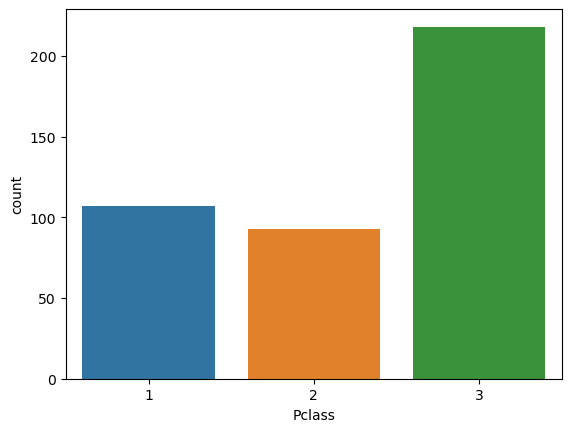

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['Pclass']) # OR
# sns.countplot(y=df['Customer_Segment'])

In [15]:

df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,28.364833,0.447368,0.392344,35.627188
std,120.810458,0.841838,13.180116,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
# checking for null values
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

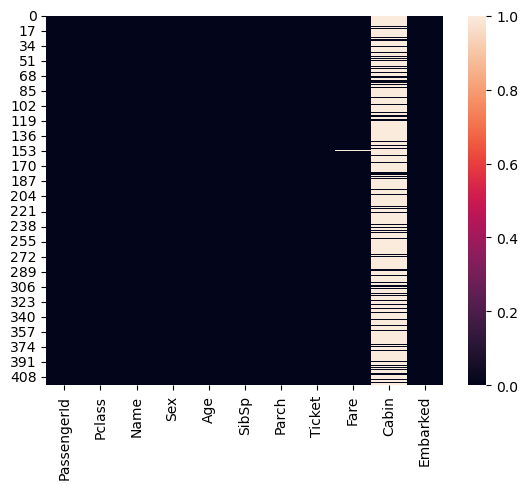

In [17]:
sns.heatmap(df.isna())# to visualise null values. There are no null values
     

In [18]:
#Explore data distributions using histograms and box plots.

In [19]:
df_numeric = df.drop('Sex', axis=1)

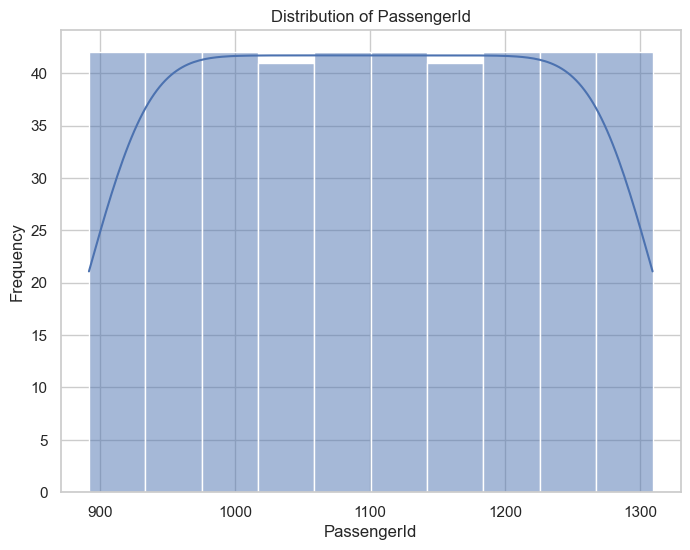

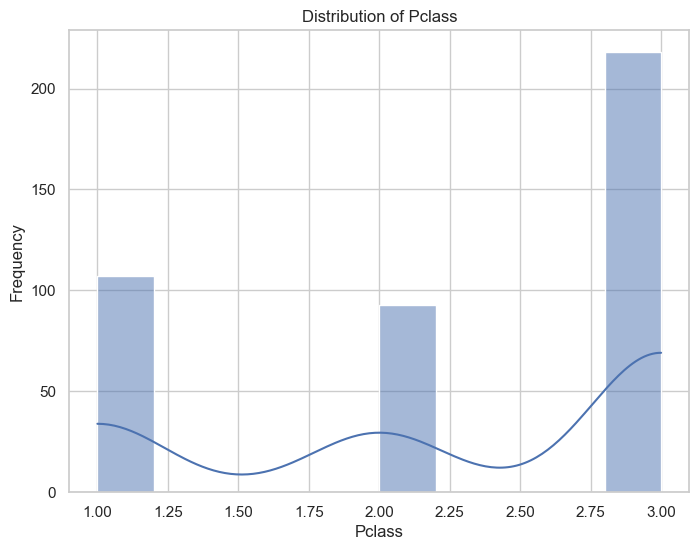

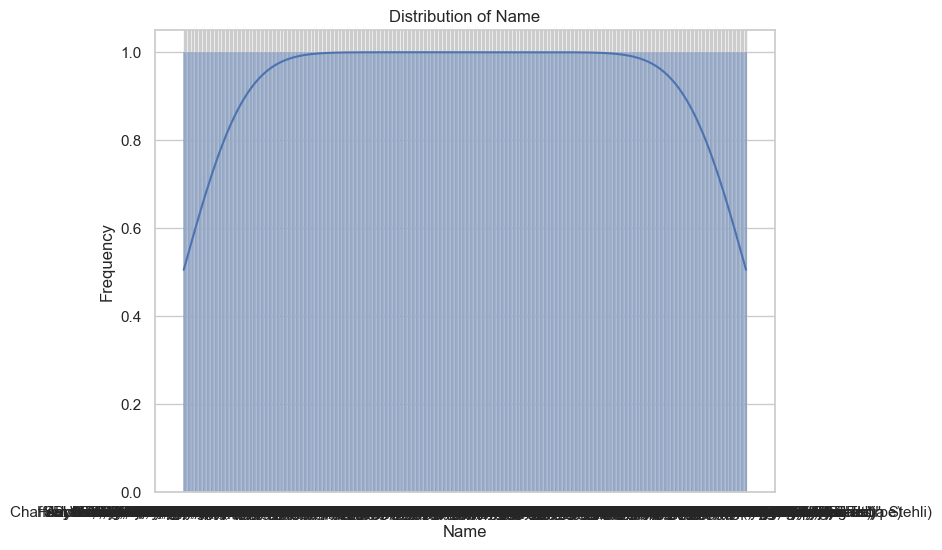

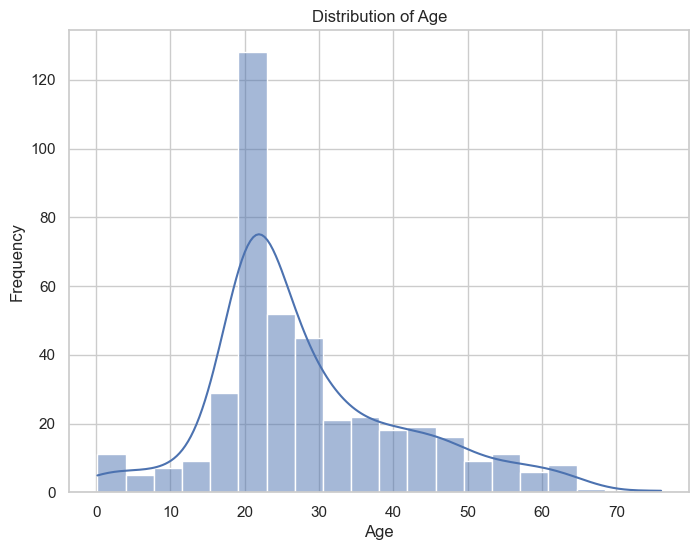

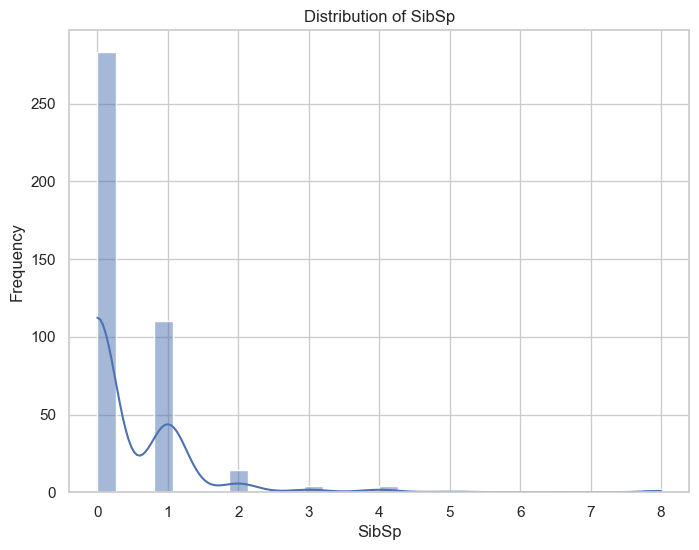

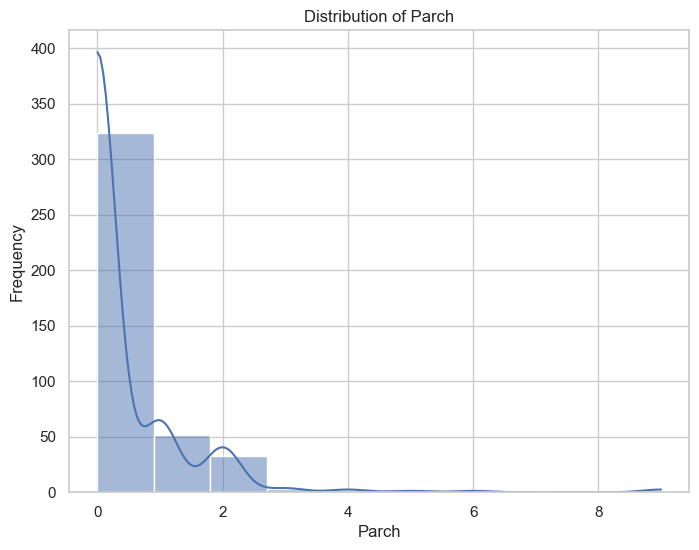

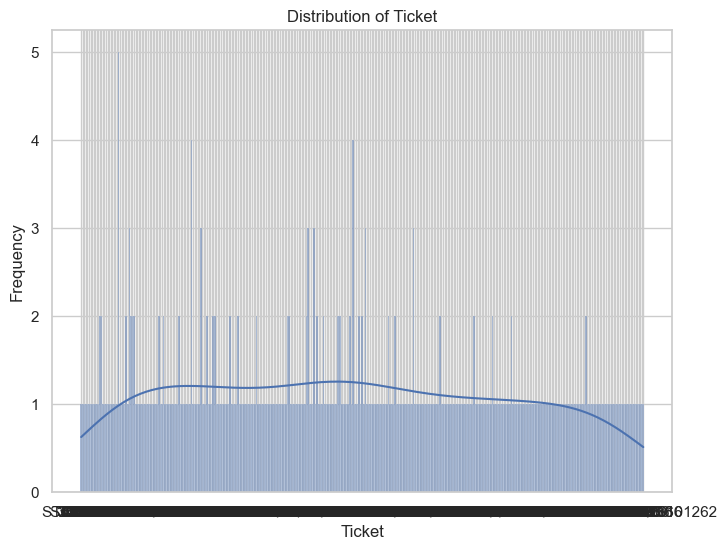

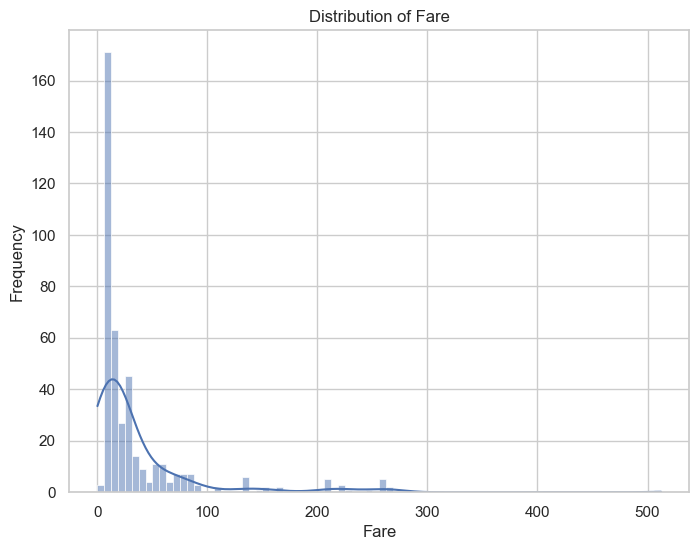

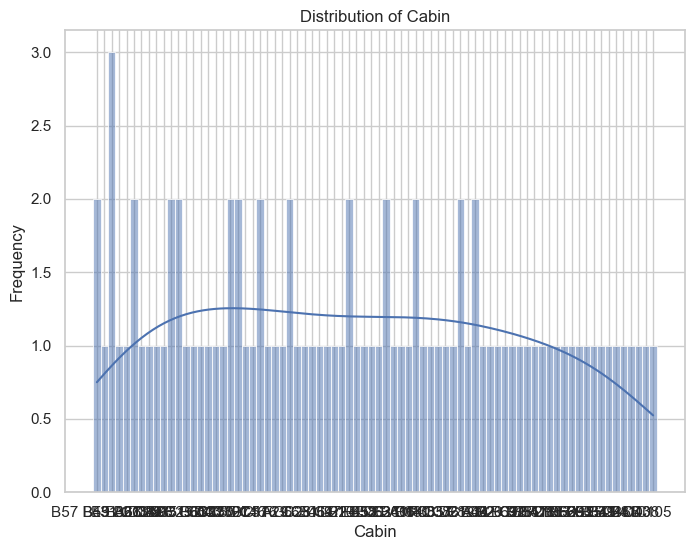

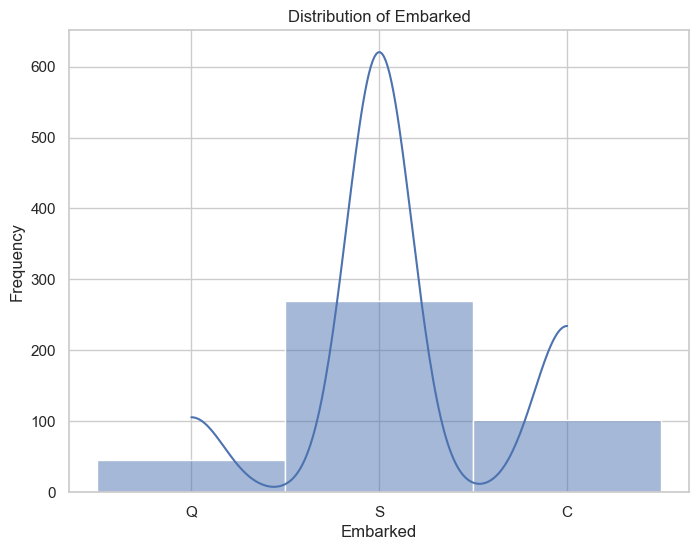

In [20]:
# Set the style
sns.set(style="whitegrid")

# Plot histograms for each numeric column
for column in df_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

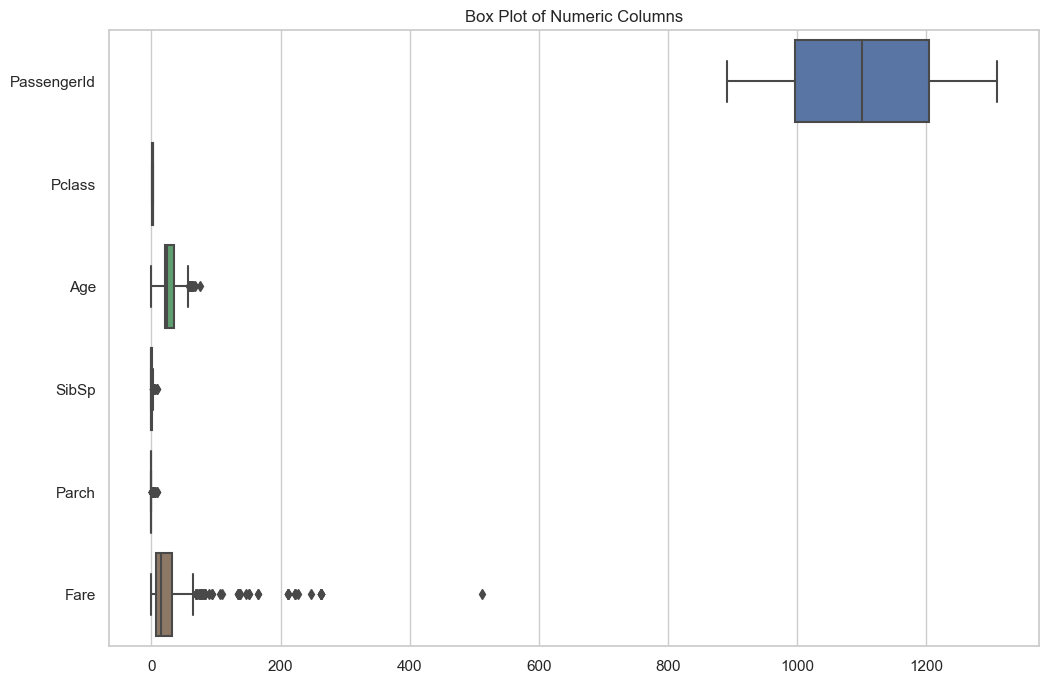

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numeric, orient='h')
plt.title('Box Plot of Numeric Columns')
plt.show()

Text(0.5, 1.0, 'Total  Class')

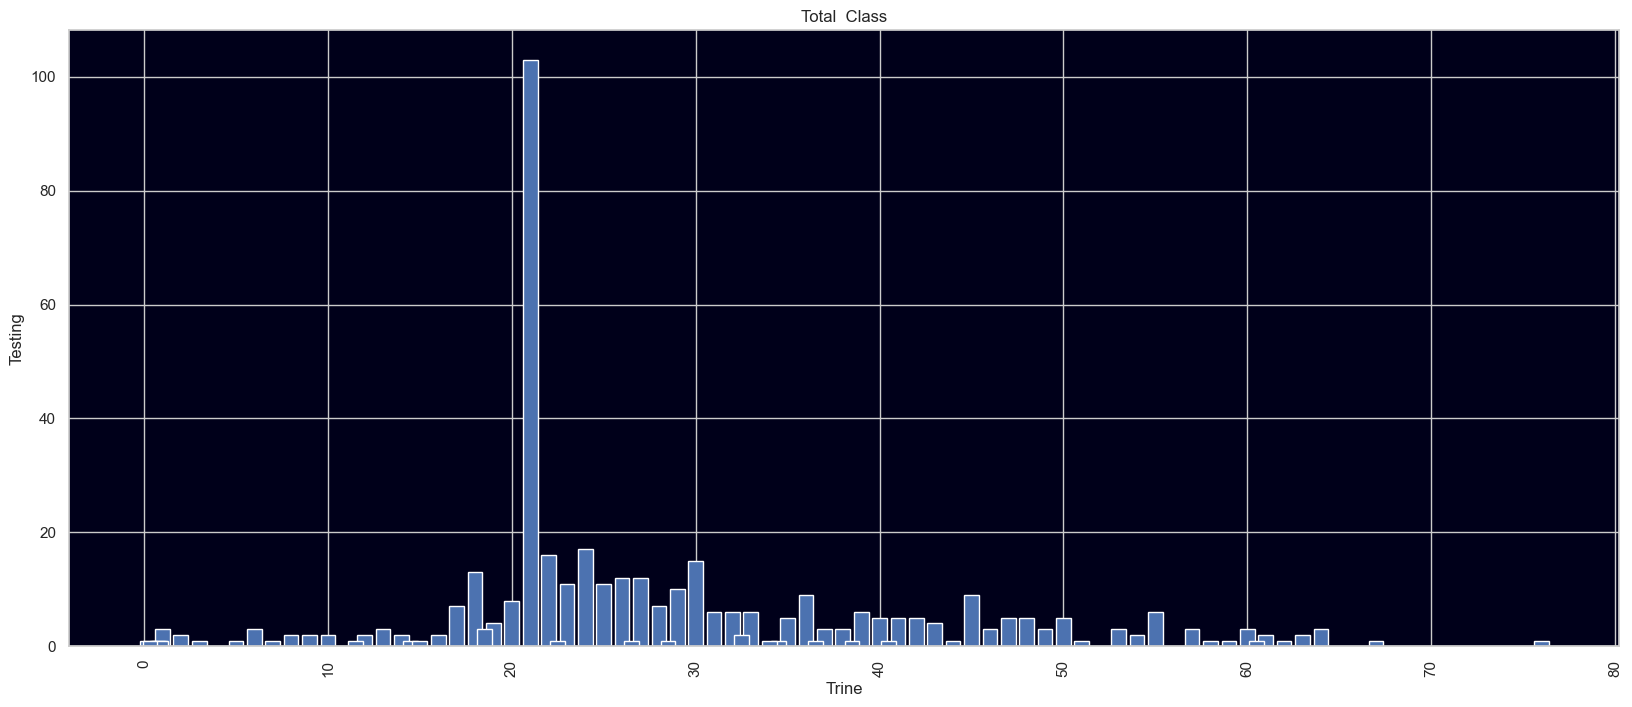

In [22]:
Age = df['Age'].value_counts()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
plt.bar(Age.index, Age.values)
plt.xticks(rotation = 90)
plt.xlabel('Trine')
plt.ylabel('Testing')
plt.title('Total  Class')

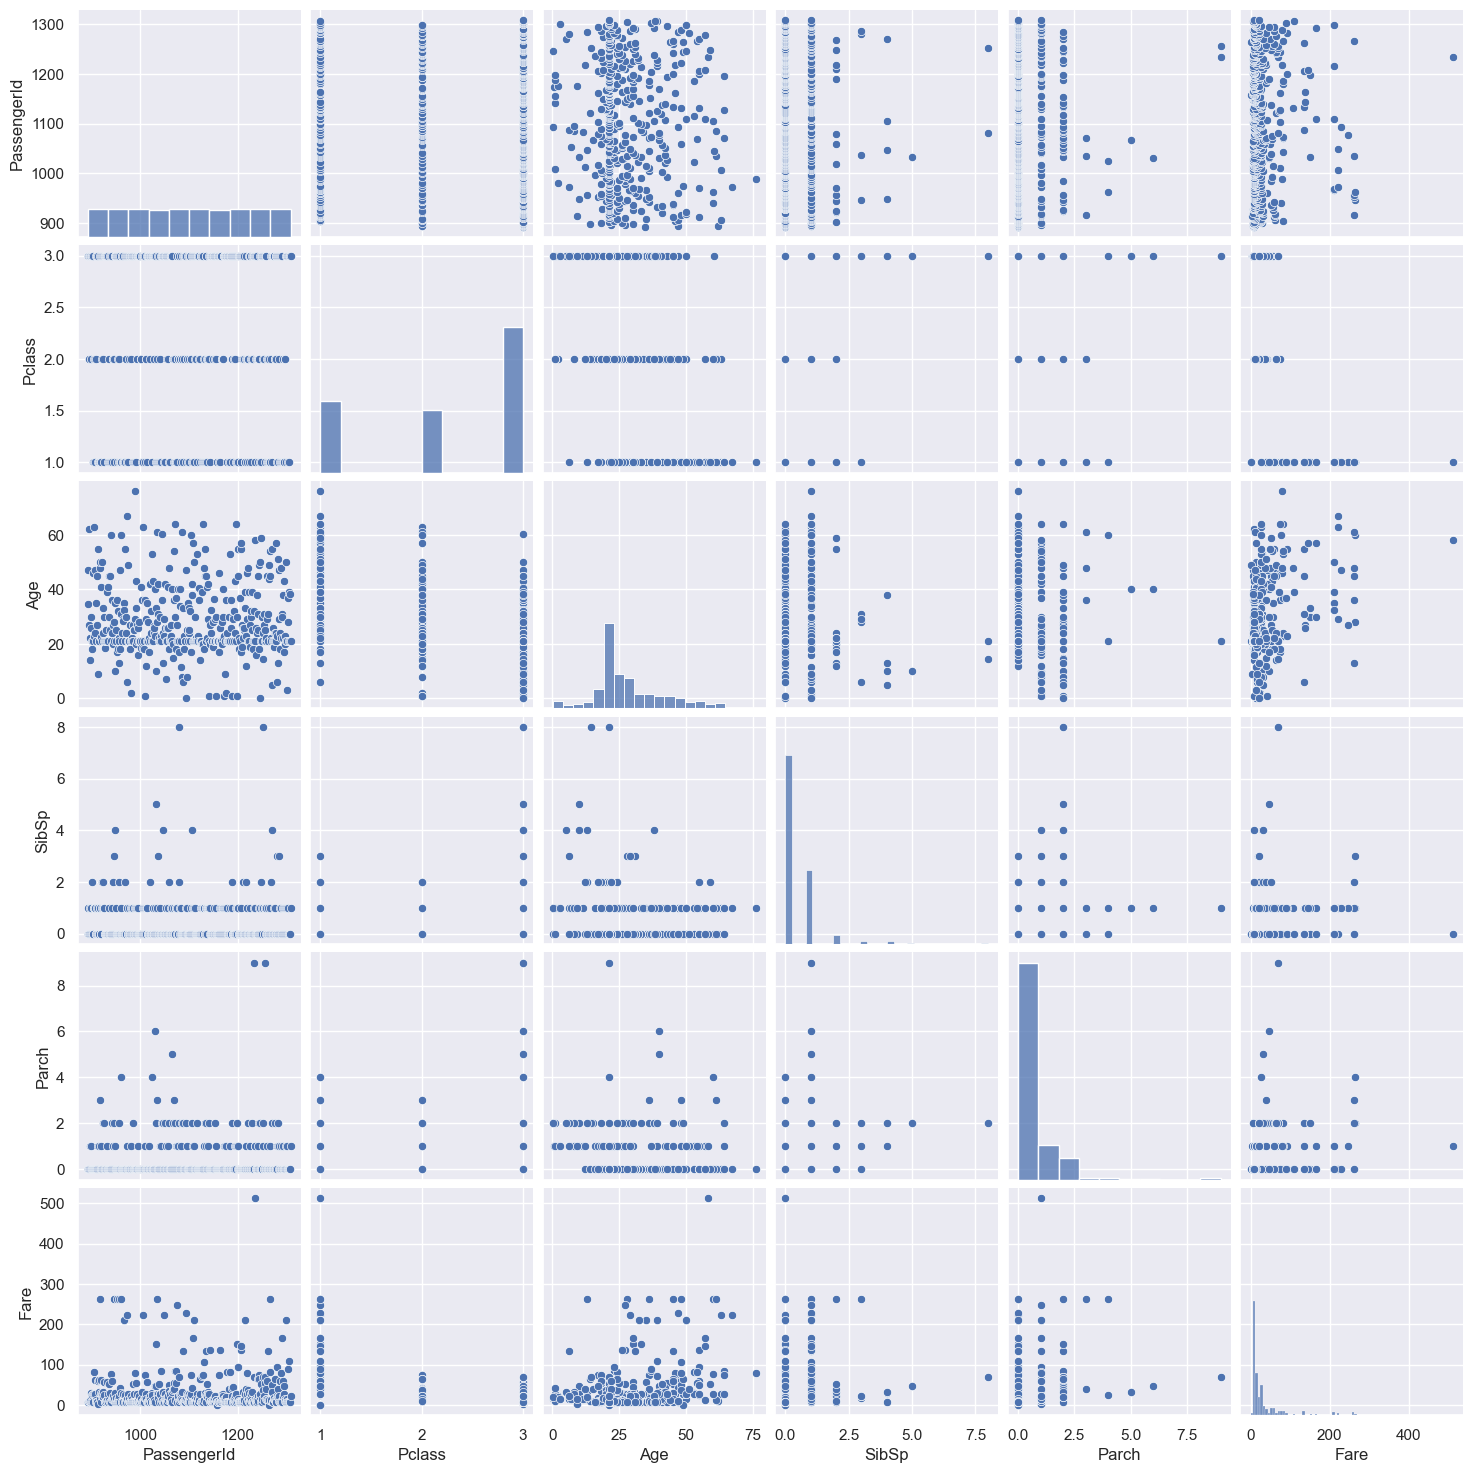

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Data Preprocessing:

In [24]:
# The number of missing data points per column

In [25]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

In [27]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X = X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

# Building Predictive Models:

In [28]:
# In Ensemble Methods Feature Scaling is not required as distance calculation is not involved
# Model Building
# Define X and Y
x=df.iloc[:,:-1] # all rows, all columns except last column
y=df['Age']

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,BaggingClassifier

from sklearn.metrics import classification_report

!pip install xgboost
from xgboost import XGBClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [30]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,21.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,21.0,0,0,359309,8.0500,NaN,S


In [31]:
df1 = df.drop(['Sex','Name','Embarked','Cabin','Ticket'], axis=1)

In [32]:
df1

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,21.0,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,21.0,0,0,8.0500


In [33]:
# In Ensemble Methods Feature Scaling is not required as distance calculation is not involved
# Model Building
# Define X and Y
x=df1.iloc[:,:-1] # all rows, all columns except last column
y=df1['Age']

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
     

In [35]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

# Applying the xgboost model

In [36]:
dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatrix(x_test)

In [37]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([44, 60, 74, 34, 27, 17, 38, 32, 22, 26, 26, 59, 29, 75, 60, 30, 45,
       26, 34, 58, 67, 12, 26, 26, 61, 63, 27, 28, 54, 26, 63, 30, 42, 26,
       38, 23, 26, 26, 31, 26, 51, 26, 54, 38, 58, 31, 58, 26, 71, 46, 30,
       34, 25, 35, 26, 13, 45, 31, 26, 46, 21, 40, 22, 27, 16, 26, 22, 60,
       39, 71, 30, 26, 37, 36, 45, 41, 26, 67, 38, 30,  9, 77, 62, 26, 26,
       26, 34, 22, 26,  6, 27, 26, 34, 26, 31, 31, 78, 37, 25, 42, 56, 34,
       26, 32, 20, 35, 26, 26, 26, 23, 54, 26, 46, 23, 75, 22, 26,  5, 46,
       37, 15, 26, 45, 35, 26, 21, 27, 26, 55, 30, 40, 65, 26, 26, 56, 30,
       33, 32, 29, 52, 13, 42, 73, 35, 55, 39, 26, 27, 26, 38, 29, 26, 72,
       46, 16, 30, 37, 29, 55, 32, 26, 10, 32, 26, 54, 32, 61, 22, 26, 27,
       26, 34, 29, 26, 52, 19, 25, 66, 46, 76, 38, 48, 22, 26, 34, 52, 26,
       21, 26, 52, 43, 26, 14, 73, 11, 42,  9, 22, 29, 26, 26,  1, 60, 11,
       31, 26, 45, 30, 42, 31, 40, 26, 21, 71, 49, 55, 26, 68, 63, 26, 38,
       26, 27, 26, 65, 26

In [38]:
ytrain

118    36.0
271    21.0
114    63.0
311    22.0
131    53.0
       ... 
71     21.0
106    21.0
270    46.0
348    24.0
102    21.0
Name: Age, Length: 292, dtype: float64

In [39]:
def prediction(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print('Train Accuracy: ',model.score(xtrain,ytrain))
  print('Test Accuracy: ',model.score(xtest,ytest))
  print(classification_report(ytest,ypred))#get confusion matrix
     

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,BaggingClassifier

from sklearn.metrics import classification_report

!pip install xgboost
from xgboost import XGBClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("Titanic_test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

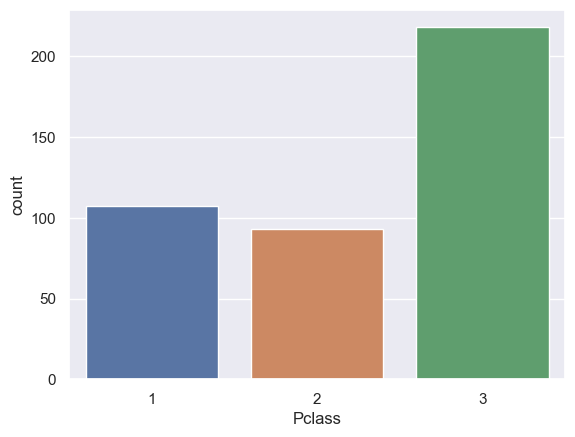

In [43]:
sns.countplot(x=df['Pclass']) # OR
# sns.countplot(y=df['Customer_Segment'])

In [44]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: >

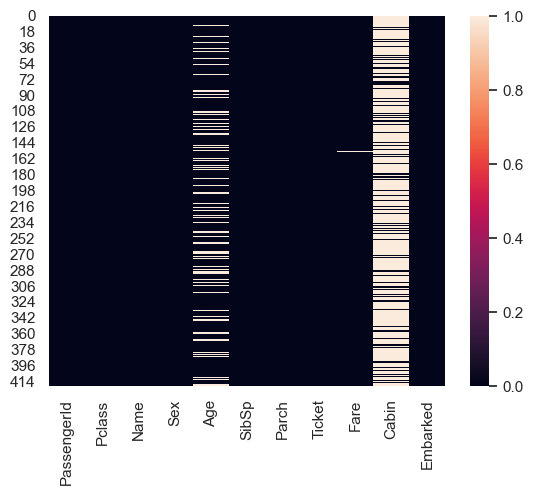

In [45]:
sns.heatmap(df.isna())# to visualise null values. There are no null values

In [46]:
# In Ensemble Methods Feature Scaling is not required as distance calculation is not involved
# Model Building
# Define X and Y
x=df.iloc[:,:-1] # all rows, all columns except last column
y=df['Pclass']
     

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
df1=df.drop(['Name','Sex','Embarked','Cabin'],axis=1) 


In [49]:
df1.drop(['Ticket'],axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,NaN,0,0,8.0500


In [50]:
df2=df1.drop(['Age','Ticket'],axis=1)

In [51]:
df2

,PassengerId,Pclass,SibSp,Parch,Fare
0,892,3,0,0,7.8292
1,893,3,1,0,7.0000
2,894,2,0,0,9.6875
3,895,3,0,0,8.6625
4,896,3,1,1,12.2875
...,...,...,...,...,...
413,1305,3,0,0,8.0500
414,1306,1,0,0,108.9000
415,1307,3,0,0,7.2500
416,1308,3,0,0,8.0500


In [53]:
# In Ensemble Methods Feature Scaling is not required as distance calculation is not involved
# Model Building
# Define X and Y
x=df2.iloc[:,:-1] # all rows, all columns except last column
y=df2['Pclass']
     

In [54]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
     

In [55]:
# Build Individual Decision Tree Model
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))#get confusion matrix
print('Train Accuracy: ',dt.score(xtrain,ytrain))
print('Test Accuracy: ',dt.score(xtest,ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        65

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Train Accuracy:  1.0
Test Accuracy:  1.0


In [56]:
# model is overfitted

In [57]:

# Build Individual Decision Tree Model
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))#get confusion matrix
print('Train Accuracy: ',dt.score(xtrain,ytrain))
print('Test Accuracy: ',dt.score(xtest,ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        65

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Train Accuracy:  1.0
Test Accuracy:  1.0


In [58]:
# model is overfitted


In [59]:
#Build individual model first. Check whether single model performing well or when we bag, it is performing well.
# Build Individual Logistic Regression Model
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)
print(classification_report(ytest,ypred))#get confusion matrix
print('Train Accuracy: ',lg.score(xtrain,ytrain))
print('Test Accuracy: ',lg.score(xtest,ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      0.84      0.92        32
           3       0.93      1.00      0.96        65

    accuracy                           0.96       126
   macro avg       0.98      0.95      0.96       126
weighted avg       0.96      0.96      0.96       126

Train Accuracy:  0.9897260273972602
Test Accuracy:  0.9603174603174603


# Avoid Repetitive task of model building by writing user defined function

# Write User Defined Function for Model Building

In [61]:
def prediction(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print('Train Accuracy: ',model.score(xtrain,ytrain))
  print('Test Accuracy: ',model.score(xtest,ytest))
  print(classification_report(ytest,ypred))#get confusion matrix
     

In [62]:
prediction(DecisionTreeClassifier())

Train Accuracy:  1.0
Test Accuracy:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        65

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [63]:
prediction(GradientBoostingClassifier())
#Overfitting is there so hypertune max_depth, no.of decision trees, learning rate alpha
     

Train Accuracy:  1.0
Test Accuracy:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        65

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



# Hyperparameter Tuning

In [64]:
params = {
    'n_estimators' : [90,110,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.6,0.7,0.9,1], # alpha between 0 to 1
    'max_depth' : [3,5,7,11]
}

In [65]:
# tuning GradientBoostingClassifier,verbose: print possible combinations or not,
# verbose=1 will not show combinations, it will show direct results
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)
# Controls the verbosity: the higher, the more messages.
# >1 : the computation time for each fold and parameter candidate is displayed;
# >2 : the score is also displayed;
# >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

# It is GridSearchCV i.e. kfold cross validation is also done
# by default 5 folds, params: 3 X 5 X 4 = 60 combinations, 60 X 5 = 300 models
     

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [66]:
grid.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 90}

In [67]:
prediction(GradientBoostingClassifier(learning_rate=0.9,max_depth=3,n_estimators=90))

Train Accuracy:  1.0
Test Accuracy:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        65

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [72]:
df['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
y

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

In [76]:
le = LabelEncoder()
y = le.fit_transform(y)
y


array([2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2,

In [77]:
ytrain

118    1
271    3
114    1
311    3
131    1
      ..
71     3
106    3
270    1
348    2
102    3
Name: Pclass, Length: 292, dtype: int64

# Stacking

In [83]:
# create a list of algorithms
models=[]
models.append(('lg',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))#default criterion='gini'
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))
     

In [84]:
models

[('lg', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy'))]

In [85]:
prediction(StackingClassifier(estimators=models,final_estimator=RandomForestClassifier(max_depth=5)))

Train Accuracy:  1.0
Test Accuracy:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        65

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

